## Import


In [ ]:
from skimage.io import imread, imshow
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import progressbar
import time
from collections import Counter
import random
import os
import pandas as pd
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Projet/code

Mounted at /content/drive


## Data selection

In [ ]:
def plot_data(data):
  plt.bar(data.keys(), data.values());
  plt.xlabel('Labels')
  plt.ylabel('Occurrence')
  plt.title('Occurrence of crops types')
  plt.show()

def getData_noClouds(gj, cover_perc, fold_path):
  data_set = {"image":[], "cropcode":[]}

  idx=0;
  bar = progressbar.ProgressBar(maxval=len(gj['features'])).start()
  for f in gj['features']:
    cc = f['properties']['crop_code']
    gid = f['properties']['gid']
    path = fold_path+gid+'.tif'
    if os.path.exists(path):
      img = imread(path)
      mask = img[:, :, 16]
      nb_cloud_pix = np.count_nonzero(mask == 255)
      nb_non_cloud_pix = np.count_nonzero(mask == 0)
      if ((nb_cloud_pix/(nb_cloud_pix+nb_non_cloud_pix)*100) < cover_perc):
        for i in range(len(mask)):
          for j in range(len(mask[0])):
            if mask[i][j] == 255:
              img[i,j, [3, 2, 1, 7]]=[np.nan, np.nan, np.nan, np.nan]
        data_set['image'].append(img)
        data_set['cropcode'].append(cc)
    idx +=1;
    bar.update(idx)
  return data_set

def equalize(data_set):
  c = Counter(data_set['cropcode'])
  key_value = {}
  for i in c.keys():
    key_value[i] = c[i]

  plot_data(key_value)

  print(key_value.keys())
  print(key_value.values())
  print()

  print("Choose an interval")
  print("lower limit")
  low = int(input())
  print("upper limit at 10%")
  up = int(low+low*0.1)
  print(up)

  for k in key_value:
    v = key_value[k]
    if v<low:
      key_value[k]=0
    else:
      rd = random.randint(low, up)
      if v<rd:
        key_value[k]=v
      else:
        key_value[k]=rd

  key_value['ot']=0
  print(key_value)
  plot_data(key_value)

  count = key_value
  cropcode = []
  image = []
  idx=0;
  bar = progressbar.ProgressBar(maxval=len(data_set['cropcode'])).start()
  for f in range(len(data_set['cropcode'])):
    cc = data_set['cropcode'][f]
    img = data_set['image'][f]
    if count[cc]!=0:
      cropcode.append(cc)
      image.append(img)
      count[cc] = count[cc] - 1
    idx +=1;
    bar.update(idx)
  data = {'image' : image, 'cropcode' : cropcode}
  return data



## create Dataset

In [ ]:
with open('DataSet/Digimap_data/Train_labels_epsg_32630.geojson') as f:
    gj = json.load(f)

In [ ]:
dataset = getData_noClouds(gj, 60, 'DataSet/Prepared_Train_Dataset/Shapes/20190724/')


In [ ]:
dataset = np.load("DataSet/data_12_24.npz", allow_pickle=True)

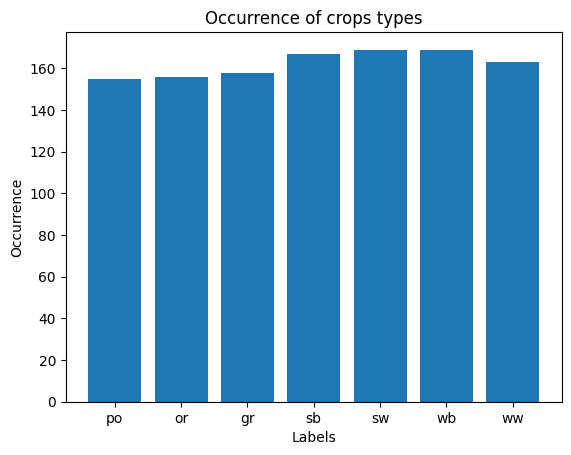

dict_keys(['po', 'or', 'gr', 'sb', 'sw', 'wb', 'ww'])
dict_values([155, 156, 158, 167, 169, 169, 163])

Choose an interval
lower limit
4
upper limit at 10%
4
{'po': 4, 'or': 4, 'gr': 4, 'sb': 4, 'sw': 4, 'wb': 4, 'ww': 4, 'ot': 0}


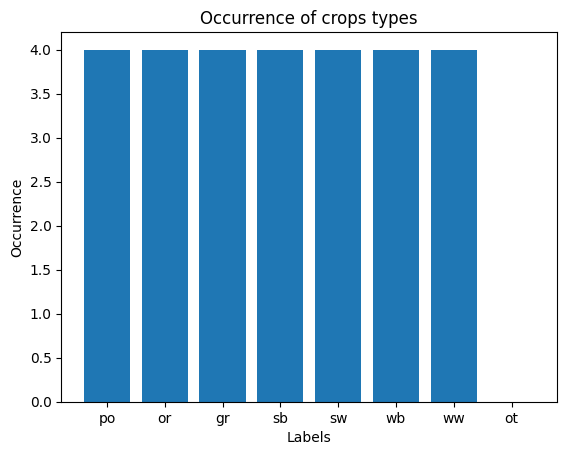

100% (1137 of 1137) |####################| Elapsed Time: 0:05:36 ETA:  00:00:00

In [ ]:
data = equalize(dataset)

In [ ]:
np.savez("DataSet/data_25_01_reduced.npz", image=data['image'], cropcode=data['cropcode'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


## test stats


In [ ]:
dataset = np.load("DataSet/data_21_01_jul.npz", allow_pickle=True)

In [ ]:
def getSize(img):
  c=0
  for row in img:
    for pix in row:
      if not math.isnan(pix):
        c+=1
  return c

In [ ]:
image = dataset['image']
cropcode = dataset['cropcode']
print("ww = Winter wheat" + '\n' +
      "sb = Spring barley" + '\n' +
      "sw = Spring Wheat" + '\n' +
      "wb = Winter barley" + '\n' +
      "be = Beet (sugar beet / fodder beet)" + '\n' +
      "fb = Field beans" + '\n' +
      "ma = Maize" + '\n' +
      "or = Oilseed rape" + '\n' +
      "po = Potatoes" + '\n' +
      "gr = Grass" + '\n' +
      "pe = Peas" + '\n' +
      "wo = Winter oats")

d = { 'ww' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'sb' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'sw' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'wb' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'be' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'fb' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'ma' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'or' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'po' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'gr' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'pe' : np.asarray([0,0,0,0,0,0,0,0,0]),
      'wo' : np.asarray([0,0,0,0,0,0,0,0,0])
      }

for i in range(len(cropcode)):
  img = image[i]/(2**4)
  stats =[getSize(img[:, :, 7]),   np.nanmean(img[:, :,3]), np.nanmean(img[:, :,2]),
          np.nanmean(img[:, :,1]), np.nanmean(img[:, :,7]), np.nanstd(img[:, :,3]),
          np.nanstd(img[:, :,2]),  np.nanstd(img[:, :,1]),  np.nanstd(img[:, :,7])]
  prev_stats = d[cropcode[i]]
  new_stats = (prev_stats*i + stats)/(i+1)
  d[cropcode[i]] = np.round(new_stats,2)
print()
df = pd.DataFrame(data=d, index=["size", "mean Red", "mean Green", "mean Blue", "mean IR", "std Red", "std Green", "std Blue", "std IR"])
print(df)

 10% (157 of 1549) |##                   | Elapsed Time: 0:00:00 ETA:   0:00:01

ww = Winter wheat
sb = Spring barley
sw = Spring Wheat
wb = Winter barley
be = Beet (sugar beet / fodder beet)
fb = Field beans
ma = Maize
or = Oilseed rape
po = Potatoes
gr = Grass
pe = Peas
wo = Winter oats


 97% (1510 of 1549) |################### | Elapsed Time: 0:00:01 ETA:   0:00:00


                ww      sb      sw      wb  be  fb  ma      or      po  \
size        135.18  204.63  175.82  146.19   0   0   0  559.72  861.05   
mean Red      5.95    9.87    7.33   13.42   0   0   0   23.64   44.06   
mean Green    7.43   13.78   10.86   11.01   0   0   0   35.40   69.25   
mean Blue     5.13    8.79    6.88    7.97   0   0   0   20.37   43.83   
mean IR      31.97   64.78   56.08   31.32   0   0   0  127.99  324.77   
std Red       2.52    4.41    3.69    4.05   0   0   0    8.81   22.56   
std Green     2.34    4.13    3.41    2.85   0   0   0    8.77   20.49   
std Blue      2.22    3.99    3.32    2.72   0   0   0    7.78   19.95   
std IR        5.43    9.22    8.04    7.17   0   0   0   18.87   72.95   

                gr  pe  wo  
size        181.47   0   0  
mean Red     16.90   0   0  
mean Green   23.85   0   0  
mean Blue    15.87   0   0  
mean IR     101.82   0   0  
std Red       7.04   0   0  
std Green     6.48   0   0  
std Blue      6.36   0   0

## Images Visualization

In [ ]:
dataset = np.load("DataSet/data_25_01_reduced.npz", allow_pickle=True)

po


/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


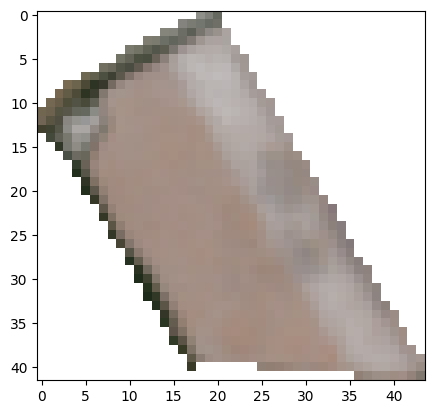

po


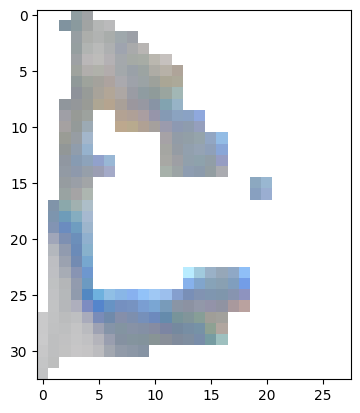

po


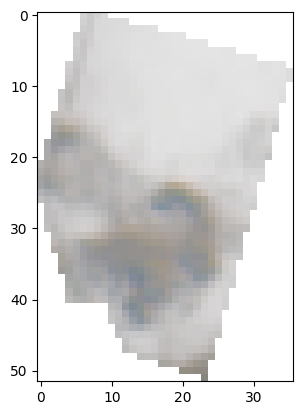

po


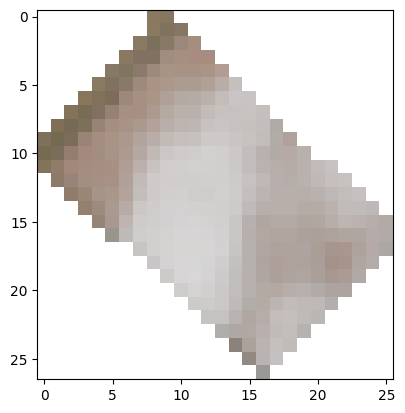

gr


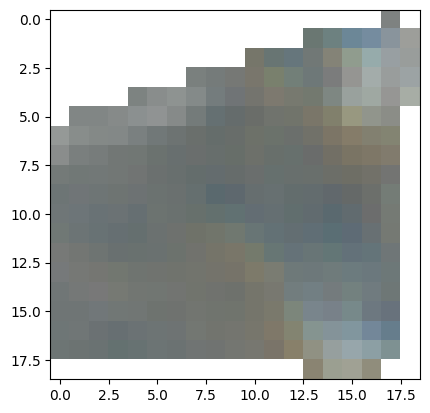

gr


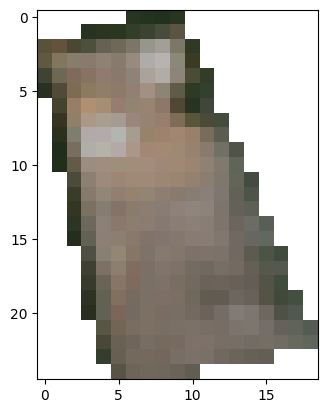

gr


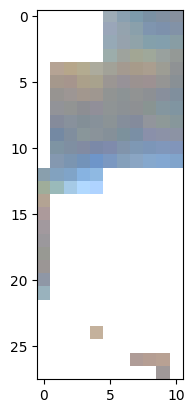

gr


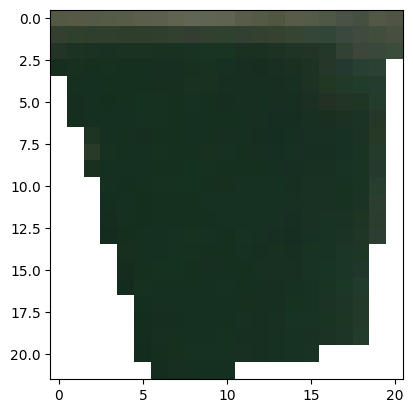

sb


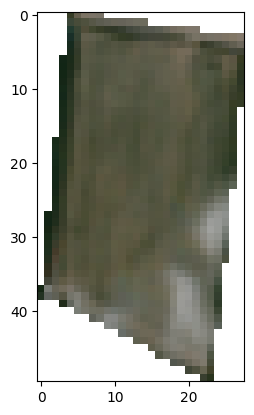

sb


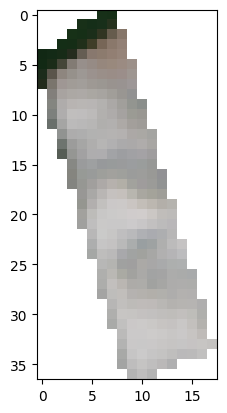

sb


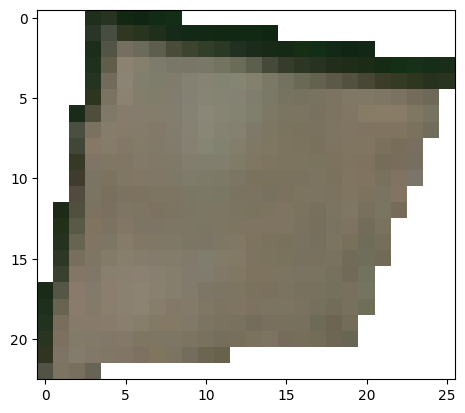

sb


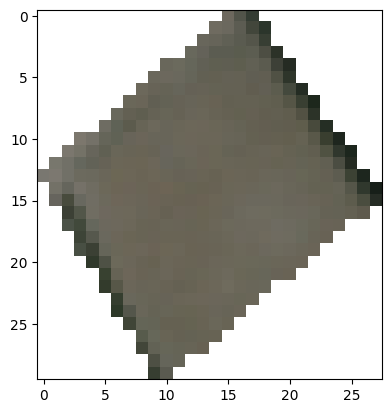

In [ ]:
image = dataset['image']
cropcode = dataset['cropcode']

codes = ['po', 'gr', 'sb']
for i in range(len(cropcode)):
  if cropcode[i] in codes:
    img = image[i]
    plt.figure()
    plt.imshow(img [:, :,[3,2,1,7]]/(2**12))
    print(cropcode[i])
    plt.show()